In [1]:

import os
import glob
import random
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with Audio files
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf
import random
import soundfile as sf 

from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from keras.callbacks import ModelCheckpoint


# MFCC feature_extraction

In [2]:

def MFcc(wav_path,num,duration,n_fft,window_length,hop_length,mel_bins,n_mfcc,sr=16000):
    duration=duration

    sound_sample,sr=librosa.load(wav_path,sr=16000,duration = duration)
    # Get the actual duration of the audio
    dur = librosa.get_duration(y=sound_sample, sr=sr)
    #print(dur)

    # Fix audio length if necessary
    input_length = int(sr * duration)
    if dur < duration:
      #print("Fixing audio length:",i)
      sound_sample = librosa.util.fix_length(sound_sample, size=input_length)

    
    mfccs = librosa.feature.mfcc(y=sound_sample,n_mfcc=n_mfcc,sr=sr,n_fft=n_fft,
                                   hop_length=hop_length, win_length=window_length,
                                   n_mels = mel_bins).T
    #print(mfccs.shape)
    #delta_mfccs = librosa.feature.delta(mfccs)
    #delta2_mfccs = librosa.feature.delta(mfccs,order=2)
   
    #array = np.array([[int(num)]*mfccs.shape[1]]*mfccs.shape[0])
    #print(array.shape)
    #mfccs=mfccs+((array)/100)
    #print(mfccs.shape)

    return mfccs
    


# Data preprocessing

In [3]:
## import os

folder="/kaggle/input/audio-mnist/data"
num_lists = 10  

paired=[]
label=[]

duration=1
# Create dictionary with keys as string numbers and empty lists as values
number = {str(i): [] for i in range(num_lists)}


for accent in os.listdir(folder):
    
    list_of_lists = [[] for _ in range(num_lists)]
    
    #ingone .txt file 
    if accent.split(".")[-1]=="txt":
        pass
    else:
        #get the number 
        for wav in os.listdir(os.path.join(folder,accent)):
            #print(wav.split("_")[0])
            #list_of_lists[int(wav.split('_')[0])].append(wav)
            list_of_lists[int(wav.split('_')[0])].append(os.path.join(folder,accent,wav))

        for i in  range(len(list_of_lists)):      
            number[str(i)].append(list_of_lists[i])



for num in tqdm(range(len(number))):
    for people in number[str(num)]:
        for wav in people:
            wav1=wav
            wav1_mfcc=MFcc(wav1,num,duration=duration,n_fft=2048,window_length=1024,hop_length=512,mel_bins=60,n_mfcc=15)
            
            random_number = random.randint(0, len(people)-1)
            wav2=people[random_number]
            wav2_mfcc=MFcc(wav2,num,duration=duration,n_fft=2048,window_length=1024,hop_length=512,mel_bins=60,n_mfcc=15)
            
            paired.append([wav1_mfcc,wav2_mfcc])
            label.append(1)
    
            random_people_num = random.randint(0, len(number[str(num)])-1)
            #print(random_people_num)
            random_people=number[str(num)][random_people_num]
            
            if random_people != people:
                random_wav_num = random.randint(0, len(random_people)-1)
                #print(random_wav_num)
        
                wav3=random_people[random_wav_num]
                wav3_mfcc=MFcc(wav3,num,duration=duration,n_fft=2048,window_length=1024,hop_length=512,mel_bins=60,n_mfcc=15)
                paired.append([wav1_mfcc,wav3_mfcc])
                label.append(0)
            else:
                
                random_wav_num = random.randint(0, len(random_people)-1)
                wav3=random_people[random_wav_num]
                wav3_mfcc=MFcc(wav3,num,duration=duration,n_fft=2048,window_length=1024,hop_length=512,mel_bins=60,n_mfcc=15)
                
                paired.append([wav1_mfcc,wav3_mfcc])
                label.append(1)



X = np.array(paired)
Y = np.array(label)

X_feature = X.reshape(X.shape[0], X.shape[1], X.shape[2], X.shape[3], 1)


100%|██████████| 10/10 [12:43<00:00, 76.39s/it]


In [4]:

print(f"X lenth :{len(X_feature)}")
print(f"X shape :{X_feature.shape}")
print(f"Y lenth :{len(Y)}")
print(f"Y shape :{Y.shape}")

X lenth :60000
X shape :(60000, 2, 32, 15, 1)
Y lenth :60000
Y shape :(60000,)


# Split the dataset

In [5]:
# Split the data into training and validation sets
X_train, x_test, Y_train, y_test= train_test_split(X_feature,Y, test_size=0.05, random_state=42)
x_train, x_val, y_train, y_val= train_test_split(X_train,Y_train, test_size=0.2, random_state=42)


print(f"x_train lenth :{len(x_train)}")
print(f"x_train shape :{x_train.shape}")
print(f"y_train lenth :{len(y_train)}")
print(f"x_train shape :{y_train.shape}")

print(f"x_test lenth :{len(x_test)}")
print(f"x_test shape :{x_test.shape}")
print(f"y_test lenth :{len(y_test)}")
print(f"x_test shape :{y_test.shape}")


print(f"x_val lenth :{len(x_val)}")
print(f"x_val shape :{x_val.shape}")
print(f"y_val lenth :{len(y_val)}")
print(f"x_val shape :{y_val.shape}")

x_train lenth :45600
x_train shape :(45600, 2, 32, 15, 1)
y_train lenth :45600
x_train shape :(45600,)
x_test lenth :3000
x_test shape :(3000, 2, 32, 15, 1)
y_test lenth :3000
x_test shape :(3000,)
x_val lenth :11400
x_val shape :(11400, 2, 32, 15, 1)
y_val lenth :11400
x_val shape :(11400,)


# Create the model

## Architect 1

In [6]:

def build_siamese_model1(input_shape=(32,15,1)):
    # Shared CNN feature extractor
    input_layer = layers.Input(input_shape)
    x = layers.Conv2D(16,3, padding = 'same',strides=(1, 1),
                      input_shape = input_shape,
                      activation = 'relu')(input_layer)
    x = layers.BatchNormalization()(x)
    
    x = layers.Conv2D(32, 3, padding = 'same',strides=(1, 1), activation = 'relu')(x)
    x = layers.Conv2D(64, 3, padding = 'same',strides=(1, 1), activation = 'relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation = 'relu', )(x)

    # Create the shared feature extraction model
    feature_extractor = models.Model(inputs=input_layer, outputs=x)

    # Create two input layers for image pairs
    input1 = layers.Input(input_shape)
    input2 = layers.Input(input_shape)

    # Extract features from both images
    output1 = feature_extractor(input1)
    output2 = feature_extractor(input2)

    # Compute L1 distance between the two feature vectors
    distance = layers.Lambda(lambda tensors: tf.abs(tensors[0] - tensors[1]))([output1, output2])

    # Final classification layer (Binary output: Similar (1) or Not Similar (0))
    #dense1 =layers.Dense(128, activation='relu')(distance)
    output = layers.Dense(1, activation='sigmoid')(distance)

    # Define the Siamese model
    model = models.Model(inputs=[input1, input2], outputs=output)

    model.summary()
    return model

In [7]:
# Build and train the model
model1 = build_siamese_model1()

# Compile the model
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 15, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 32, 15, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 128)            │      3,955,904 │ input_layer_1[0][0],   │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 128)            │              0 │ functional[0][0],      │
│                           │                        │                │ functional[1][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │            129 │ lambda[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,956,033 (15.09 MB)

 Trainable params: 3,955,873 (15.09 MB)

 Non-trainable params: 160 (640.00 B)

### Checkpoint

In [8]:

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=20,
                                            restore_best_weights=True,
                                           verbose=1)


# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint("voice_authentication_model1.keras", save_best_only=True, monitor='val_loss', verbose=1)

### Training model

In [9]:
# Train the model
history1=model1.fit([x_train[:, 0], x_train[:, 1]],
                   y_train,
                   epochs=100,
                   batch_size=128,
                   validation_data=([x_val[:, 0], x_val[:, 1]], y_val),
                   callbacks=[callback,checkpoint],
                   verbose=1
                  )


Epoch 1/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6856 - loss: 0.5813
Epoch 1: val_loss improved from inf to 0.43654, saving model to voice_authentication_model1.keras
357/357 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.6858 - loss: 0.5810 - val_accuracy: 0.7711 - val_loss: 0.4365
Epoch 2/100
355/357 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8934 - loss: 0.2839
Epoch 2: val_loss improved from 0.43654 to 0.31153, saving model to voice_authentication_model1.keras
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8934 - loss: 0.2837 - val_accuracy: 0.8654 - val_loss: 0.3115
Epoch 3/100
355/357 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9382 - loss: 0.1732
Epoch 3: val_loss improved from 0.31153 to 0.24448, saving model to voice_authentication_model1.keras
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9382 - loss: 0.1732 - val_accuracy: 0.8989 - val_loss: 0.2445
Epoch 4/100
356/357 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9642 - loss: 0

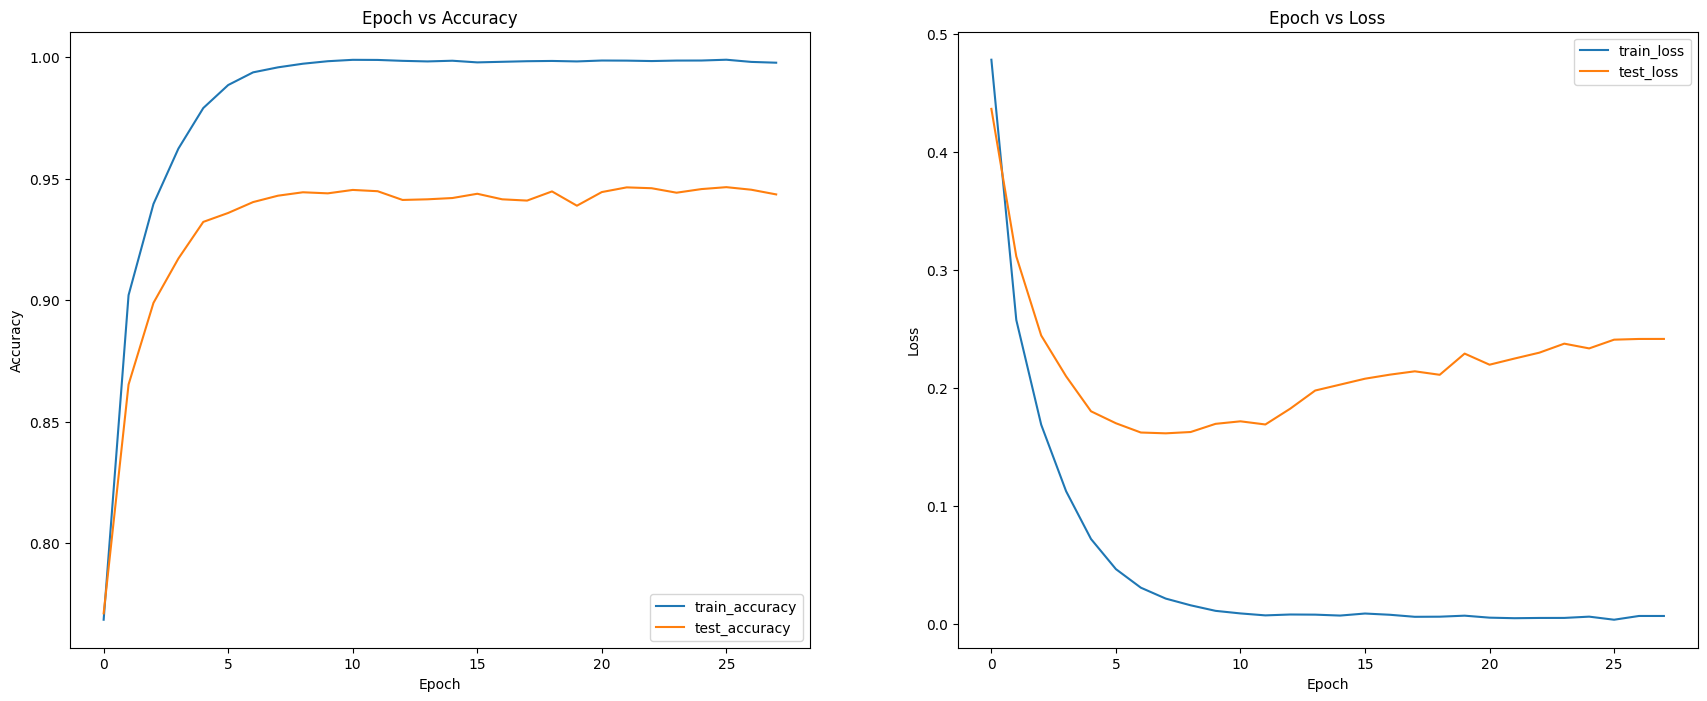

In [10]:
##
plt.figure(figsize=(21, 8))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='train_accuracy')
plt.plot(history1.history['val_accuracy'], label='test_accuracy')
plt.title("Epoch vs Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.plot(history1.history["loss"], label='train_loss')
plt.plot(history1.history["val_loss"], label='test_loss')
plt.title("Epoch vs Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

 ## Architect 2

In [11]:

def build_siamese_model2(input_shape=(32,15,1)):
    # Shared CNN feature extractor
    input_layer = layers.Input(input_shape)
    x = layers.Conv2D(16,3, padding = 'same',strides=(1, 1),
                      input_shape = input_shape,
                      activation = 'relu')(input_layer)
    x = layers.BatchNormalization()(x)
    
    x = layers.Conv2D(32, 3, padding = 'same',strides=(1, 1), activation = 'relu')(x)
    x = layers.Conv2D(64, 3, padding = 'same',strides=(1, 1), activation = 'relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)

    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation = 'relu', )(x)

    # Create the shared feature extraction model
    feature_extractor = models.Model(inputs=input_layer, outputs=x)

    # Create two input layers for image pairs
    input1 = layers.Input(input_shape)
    input2 = layers.Input(input_shape)

    # Extract features from both images
    output1 = feature_extractor(input1)
    output2 = feature_extractor(input2)

    # Compute L1 distance between the two feature vectors
    #distance = layers.Lambda(lambda tensors: tf.abs(tensors[0] - tensors[1]))([output1, output2])
    concat = Concatenate()([output1, output2])

    # Final classification layer (Binary output: Similar (1) or Not Similar (0))
    dense1 =layers.Dense(512, activation='relu')(concat)
    output = layers.Dense(1, activation='sigmoid')(dense1)

    # Define the Siamese model
    model = models.Model(inputs=[input1, input2], outputs=output)

    model.summary()
    return model

In [12]:
model2 = build_siamese_model2()

# Compile the model
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 32, 15, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 32, 15, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_2 (Functional) │ (None, 128)            │      3,955,904 │ input_layer_4[0][0],   │
│                           │                        │                │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 256)            │              0 │ functional_2[0][0],    │
│                           │                        │                │ functional_2[1][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 512)            │        131,584 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1)              │            513 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,088,001 (15.59 MB)

 Trainable params: 4,087,841 (15.59 MB)

 Non-trainable params: 160 (640.00 B)

### Checkpoint


In [13]:

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=20,
                                            restore_best_weights=True,
                                           verbose=1)


# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint("voice_authentication_model2.keras", save_best_only=True, monitor='val_loss', verbose=1)

### Training 

In [14]:

history2=model2.fit([x_train[:, 0], x_train[:, 1]],
                   y_train,
                   epochs=100,
                   batch_size=128,
                   validation_data=([x_val[:, 0], x_val[:, 1]], y_val),
                   callbacks=[callback,checkpoint],
                   verbose=1
                  )


Epoch 1/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5154 - loss: 0.7123
Epoch 1: val_loss improved from inf to 0.63359, saving model to voice_authentication_model2.keras
357/357 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.5155 - loss: 0.7122 - val_accuracy: 0.6330 - val_loss: 0.6336
Epoch 2/100
355/357 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7272 - loss: 0.5474
Epoch 2: val_loss improved from 0.63359 to 0.35633, saving model to voice_authentication_model2.keras
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7276 - loss: 0.5468 - val_accuracy: 0.8539 - val_loss: 0.3563
Epoch 3/100
355/357 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8708 - loss: 0.3115
Epoch 3: val_loss improved from 0.35633 to 0.26306, saving model to voice_authentication_model2.keras
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8708 - loss: 0.3113 - val_accuracy: 0.8934 - val_loss: 0.2631
Epoch 4/100
355/357 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9068 - loss: 0

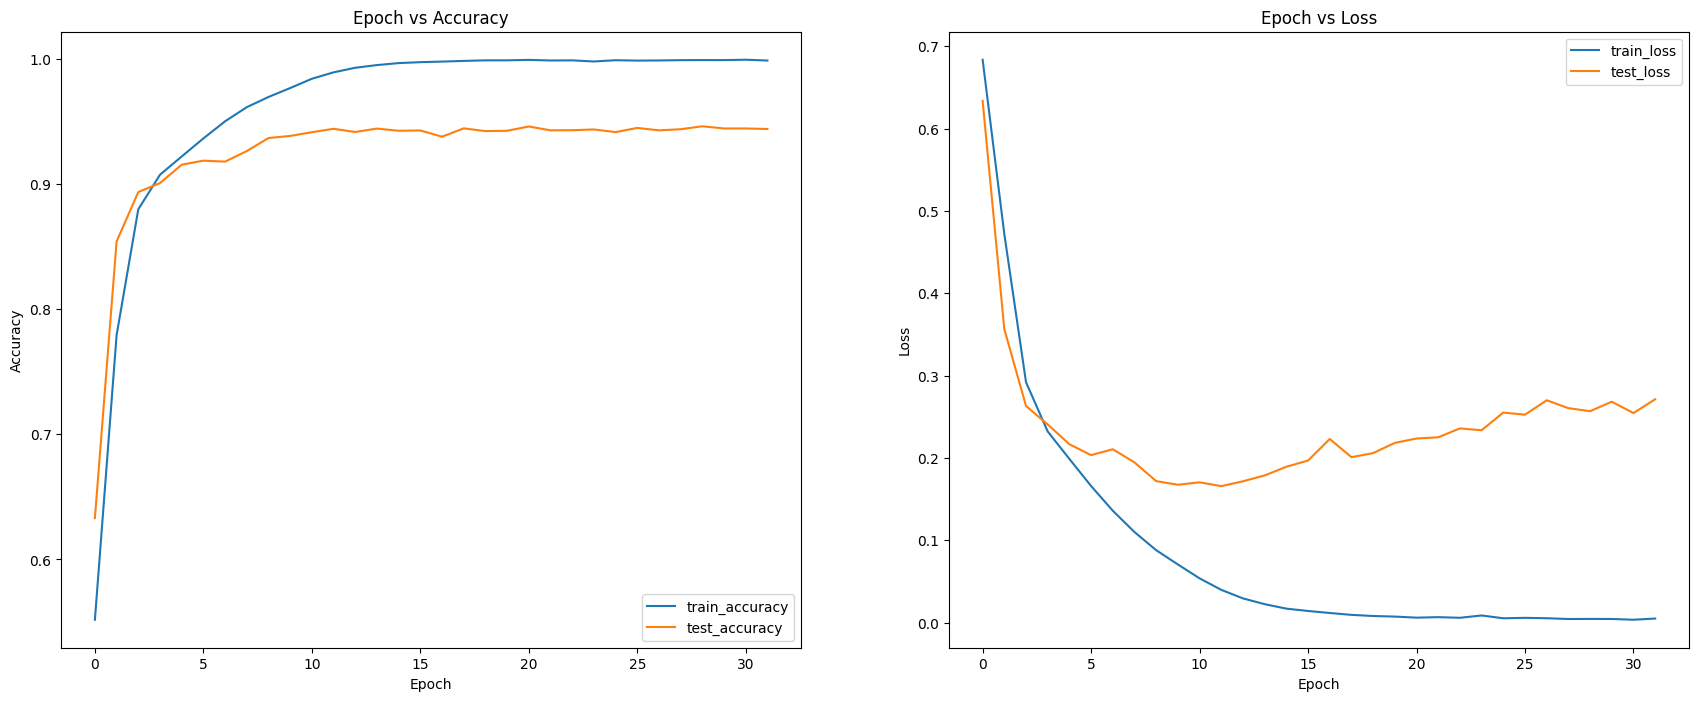

In [15]:
##
plt.figure(figsize=(21, 8))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='train_accuracy')
plt.plot(history2.history['val_accuracy'], label='test_accuracy')
plt.title("Epoch vs Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.plot(history2.history["loss"], label='train_loss')
plt.plot(history2.history["val_loss"], label='test_loss')
plt.title("Epoch vs Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Evaluation

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def evaluation(model,x_test,y_test,classes):

    pred=model.predict([x_test[:, 0], x_test[:, 1]])
    pred_y=[1 if i>=0.5 else 0 for i in pred  ]

        
    # Generate classification report
    report = classification_report(y_test,pred_y, target_names=classes)
    print(report)

    # Compute confusion matrix
    cm = confusion_matrix(y_test,pred_y)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

        real       0.94      0.93      0.93      1457
        fake       0.93      0.94      0.94      1543

    accuracy                           0.94      3000
   macro avg       0.94      0.93      0.93      3000
weighted avg       0.94      0.94      0.93      3000



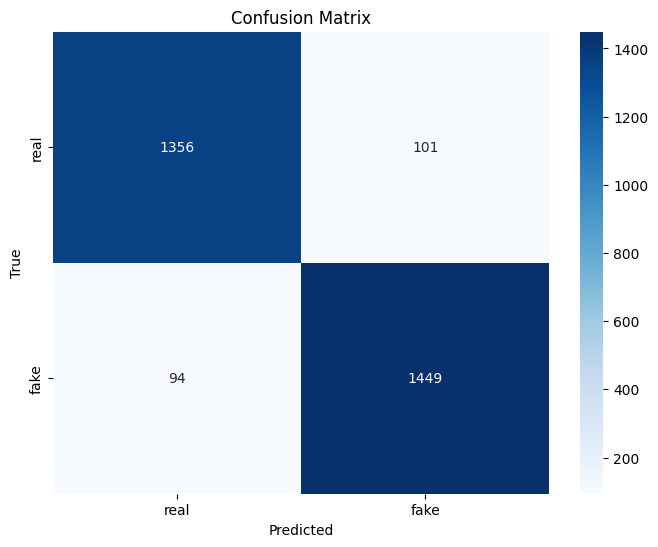

In [17]:


evaluation(model2,x_test,y_test,classes=["real","fake"])

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

        real       0.92      0.94      0.93      1457
        fake       0.95      0.92      0.93      1543

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



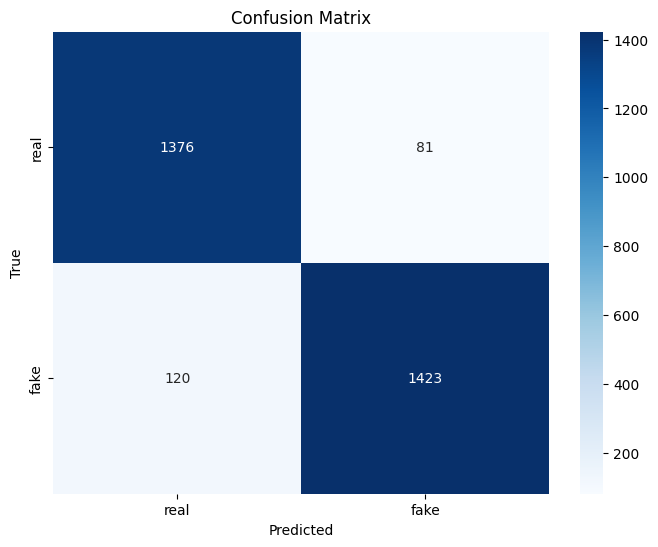

In [18]:
evaluation(model1,x_test,y_test,classes=["real","fake"])

# Inference

In [19]:



def MFcc(wav_path,num,duration,n_fft,window_length,hop_length,mel_bins,n_mfcc,sr=16000):

    sound_sample,sr=librosa.load(wav_path,sr=16000,duration = duration)
    # Get the actual duration of the audio
    dur = librosa.get_duration(y=sound_sample, sr=sr)
    #print(dur)

    # Fix audio length if necessary
    input_length = int(sr * duration)
    if dur < duration:
      #print("Fixing audio length:",i)
      sound_sample = librosa.util.fix_length(sound_sample, size=input_length)

    
    mfccs = librosa.feature.mfcc(y=sound_sample,n_mfcc=n_mfcc,sr=sr,n_fft=n_fft,
                                   hop_length=hop_length, win_length=window_length,
                                   n_mels = mel_bins).T
    #print(mfccs.shape)
    #delta_mfccs = librosa.feature.delta(mfccs)
    #delta2_mfccs = librosa.feature.delta(mfccs,order=2)
   
    array = np.array([[int(num)]*mfccs.shape[1]]*mfccs.shape[0])
    #print(array.shape)
    mfccs=mfccs+((array)/100)
    #print(mfccs.shape)

    return mfccs
    


In [20]:


def inference (model,wav1_path,wav2_path,num):
    mfccs1=MFcc(wav1_path,num,duration=1,n_fft=2048,window_length=1024,hop_length=512,mel_bins=60,n_mfcc=15)
    mfccs2=MFcc(wav2_path,num,duration=1,n_fft=2048,window_length=1024,hop_length=512,mel_bins=60,n_mfcc=15)

    # Convert to NumPy arrays
    mfccs1 = np.array(mfccs1)
    mfccs2 = np.array(mfccs2)

    # Debugging: Print shapes before reshaping
    print("Original mfccs1 shape:", mfccs1.shape)
    print("Original mfccs2 shape:", mfccs2.shape)

    # Add batch and channel dimensions → (1, 87, 15, 1)
    mfccs1 = np.expand_dims(mfccs1, axis=(0, -1))
    mfccs2 = np.expand_dims(mfccs2, axis=(0, -1))

    # Debugging: Print shapes after reshaping
    print("Reshaped mfccs1 shape:", mfccs1.shape)  # Expected: (1, 87, 15, 1)
    print("Reshaped mfccs2 shape:", mfccs2.shape)  # Expected: (1, 87, 15, 1)

    # Pass as a list of inputs
    pred = model.predict([mfccs1, mfccs2])
    print(pred)
    if pred[0]>= 0.5:
        
        return "voice matched"
    else:
        return "voice not matched"
        
   
    
    

In [21]:

##same voice
wav1_path="/kaggle/input/audio-mnist/data/08/2_08_25.wav"
wav2_path="/kaggle/input/audio-mnist/data/08/2_08_20.wav"

num=2
inference (model1,wav1_path,wav2_path,num)

Original mfccs1 shape: (32, 15)
Original mfccs2 shape: (32, 15)
Reshaped mfccs1 shape: (1, 32, 15, 1)
Reshaped mfccs2 shape: (1, 32, 15, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
[[0.99841464]]


'voice matched'

In [22]:
#diferent voice
wav1_path="/kaggle/input/audio-mnist/data/08/2_08_20.wav"
wav2_path="/kaggle/input/audio-mnist/data/12/2_12_24.wav"
num=2
inference (model2,wav1_path,wav2_path,num)

Original mfccs1 shape: (32, 15)
Original mfccs2 shape: (32, 15)
Reshaped mfccs1 shape: (1, 32, 15, 1)
Reshaped mfccs2 shape: (1, 32, 15, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
[[2.2954623e-08]]


'voice not matched'